# Lab 03

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2023-10-30 15:27:09.783053: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

In [3]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
rand_idxs = np.random.randint(x_train.shape[0], size=18)
rand_idxs

array([41499, 44293, 10873, 10986, 29968, 40606,  7476, 43695, 10990,
        2501, 13462, 27675, 15026, 42408, 17630, 15423,  2464, 45823])

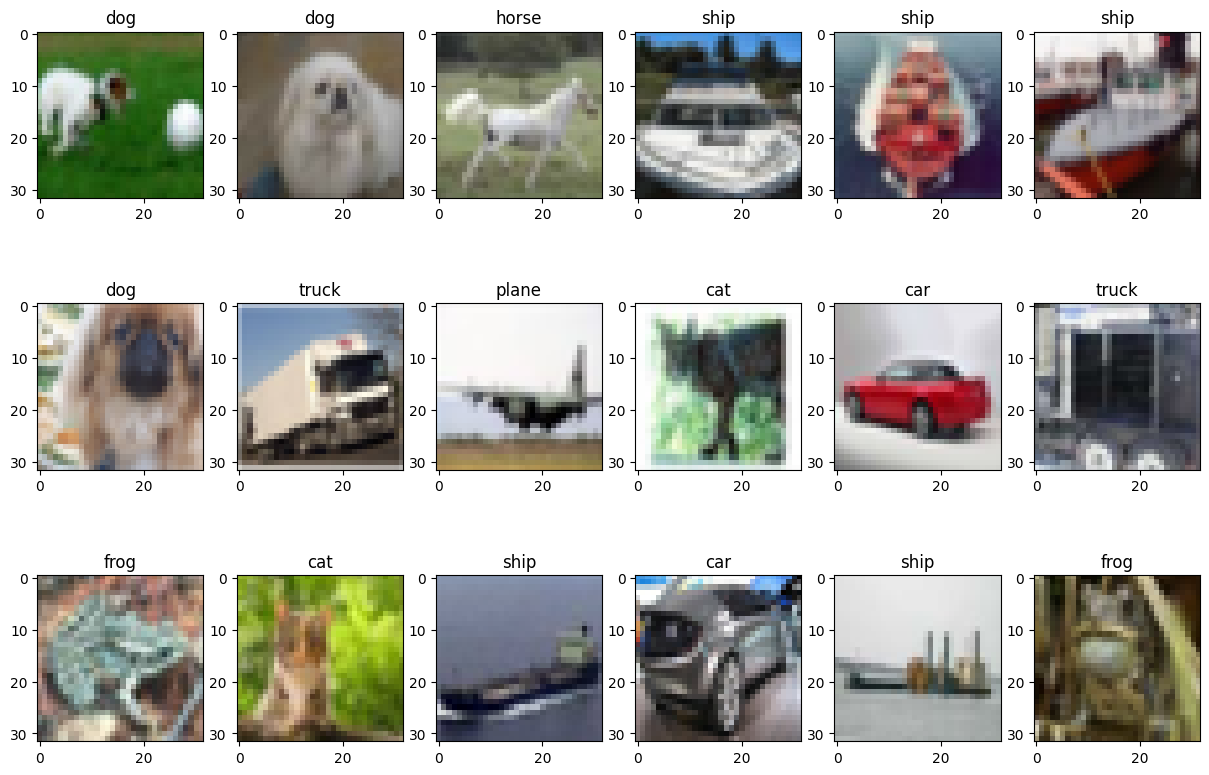

In [5]:
# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = rand_idxs[ii]
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

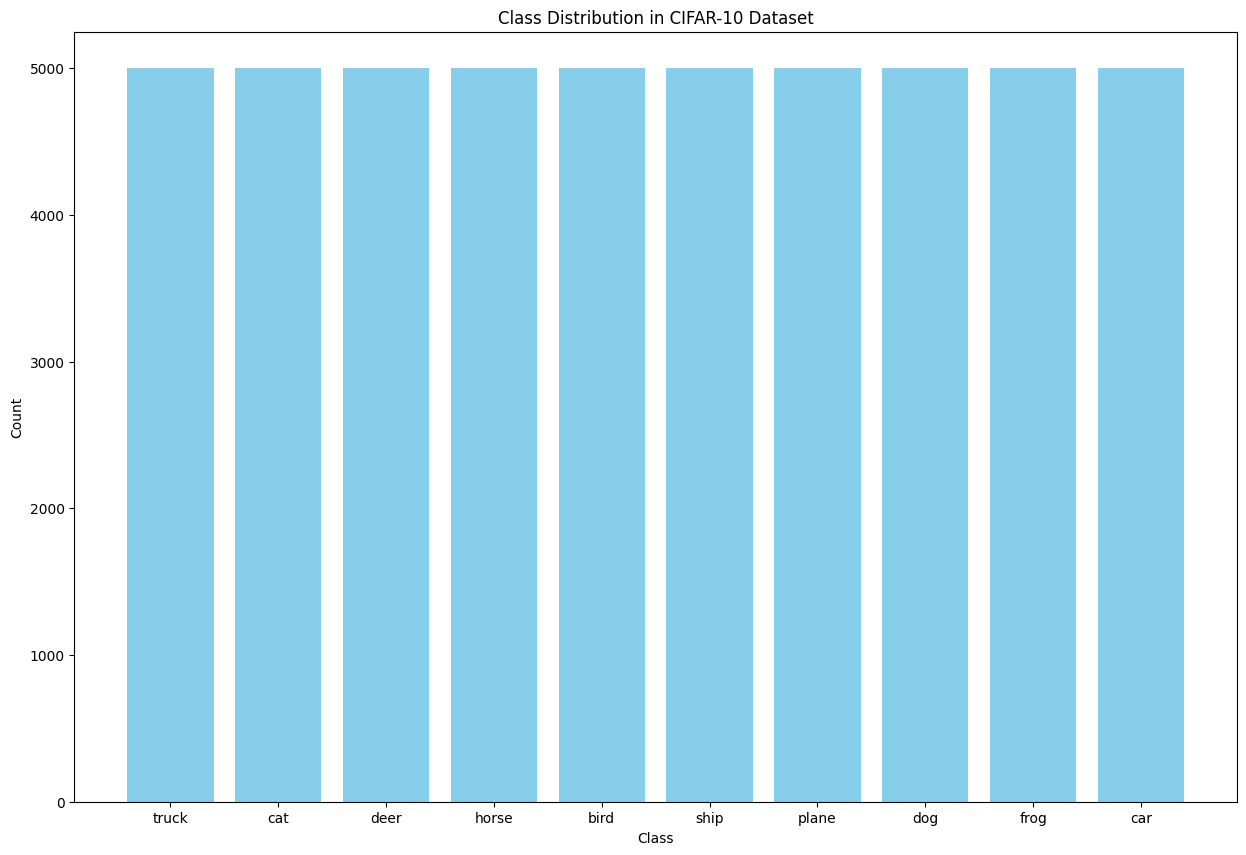

In [6]:
# Compute the class histogram
from collections import Counter

# Count the occurrences of each label using Counter
label_counter = Counter(y_train.reshape(-1))

# Get labels and counts
labels, counts = zip(*label_counter.items())

plt.bar(labels, counts, tick_label=list(classes.values()), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in CIFAR-10 Dataset')
plt.show()

In [7]:
# Check if the dataset is balanced
is_balanced = len(set(counts)) == 1
print(f"The dataset is balanced: {is_balanced}")

The dataset is balanced: True


### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
# Normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# One-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [10]:
# Build the classifier

inputs = Input(shape=x_train.shape[1:])

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)

outputs = Dense(10, activation="softmax")(net)

model1 = Model(inputs, outputs)
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0     

### Step 3: Training

Compile the model and train it.

In [12]:
# Train the model
history = model1.fit(x_train, y_train,
                    batch_size=128,
                    epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 5s 12ms/step - loss: 1.7304 - accuracy: 0.3807 - val_loss: 1.5251 - val_accuracy: 0.4474
Epoch 2/25
391/391 [==============================] - 4s 11ms/step - loss: 1.4178 - accuracy: 0.4984 - val_loss: 1.3739 - val_accuracy: 0.5168
Epoch 3/25
391/391 [==============================] - 4s 11ms/step - loss: 1.3133 - accuracy: 0.5419 - val_loss: 1.2833 - val_accuracy: 0.5504
Epoch 4/25
391/391 [==============================] - 4s 11ms/step - loss: 1.2226 - accuracy: 0.5752 - val_loss: 1.2430 - val_accuracy: 0.5622
Epoch 5/25
391/391 [==============================] - 4s 11ms/step - loss: 1.1588 - accuracy: 0.5983 - val_loss: 1.1553 - val_accuracy: 0.5941
Epoch 6/25
391/391 [==============================] - 4s 11ms/step - loss: 1.1197 - accuracy: 0.6131 - val_loss: 1.1189 - val_accuracy: 0.6133
Epoch 7/25
391/391 [==============================] - 4s 11ms/step - loss: 1.0818 - accuracy: 0.6252 - val_loss: 1.1000 - val_accuracy: 0.6195

Train Acc      0.7071400284767151
Validation Acc 0.664900004863739


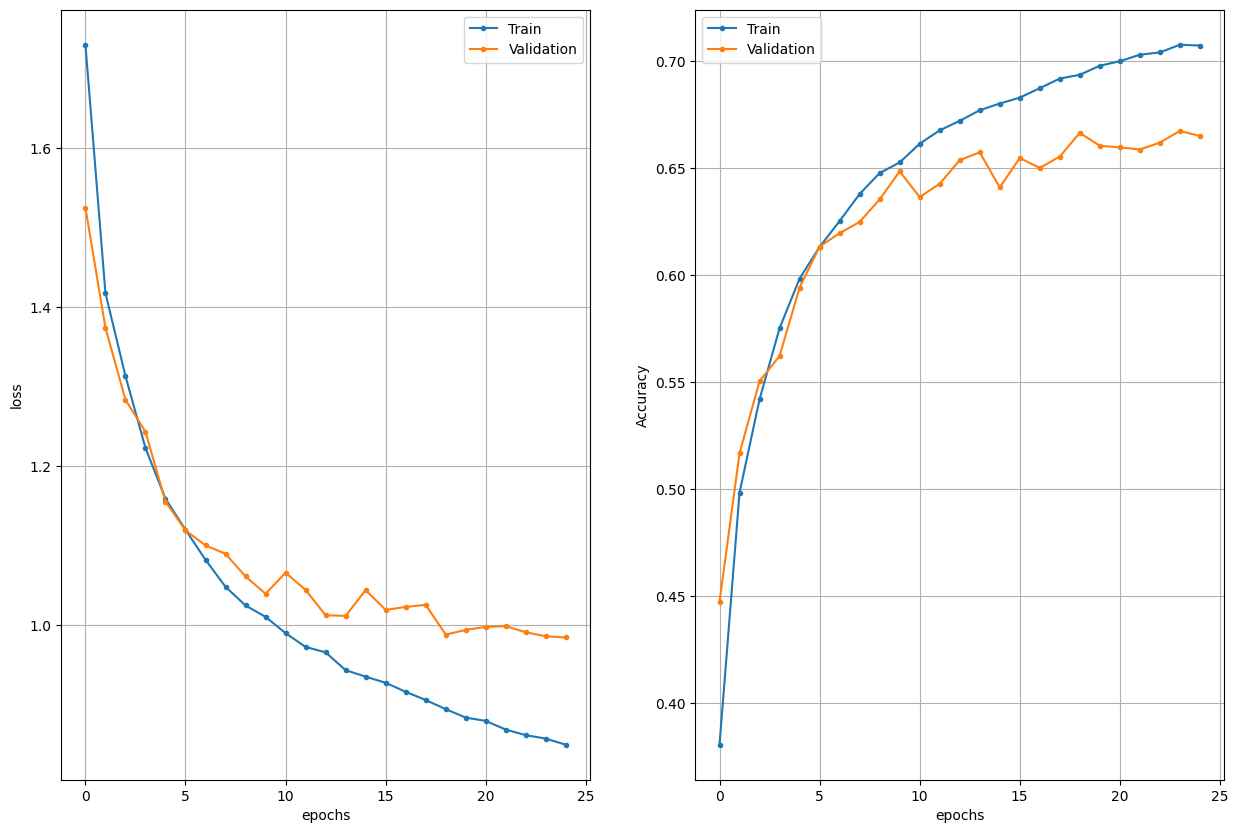

In [13]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [14]:
from sklearn.metrics import confusion_matrix

In [16]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model1.predict(x_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [17]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Compute accuracy for each class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

In [18]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    print(f"Accuracy for {class_name}: {class_accuracy[class_id]*100:.2f}%")

Accuracy for plane: 71.00%
Accuracy for car: 74.20%
Accuracy for bird: 44.00%
Accuracy for cat: 44.20%
Accuracy for deer: 73.70%
Accuracy for dog: 54.00%
Accuracy for frog: 77.80%
Accuracy for horse: 67.20%
Accuracy for ship: 81.50%
Accuracy for truck: 77.30%


In [23]:
# Print the overall stats
ev = model1.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test acc', ev[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.9841 - accuracy: 0.6649
Test loss   0.9840896725654602
Test acc 0.664900004863739


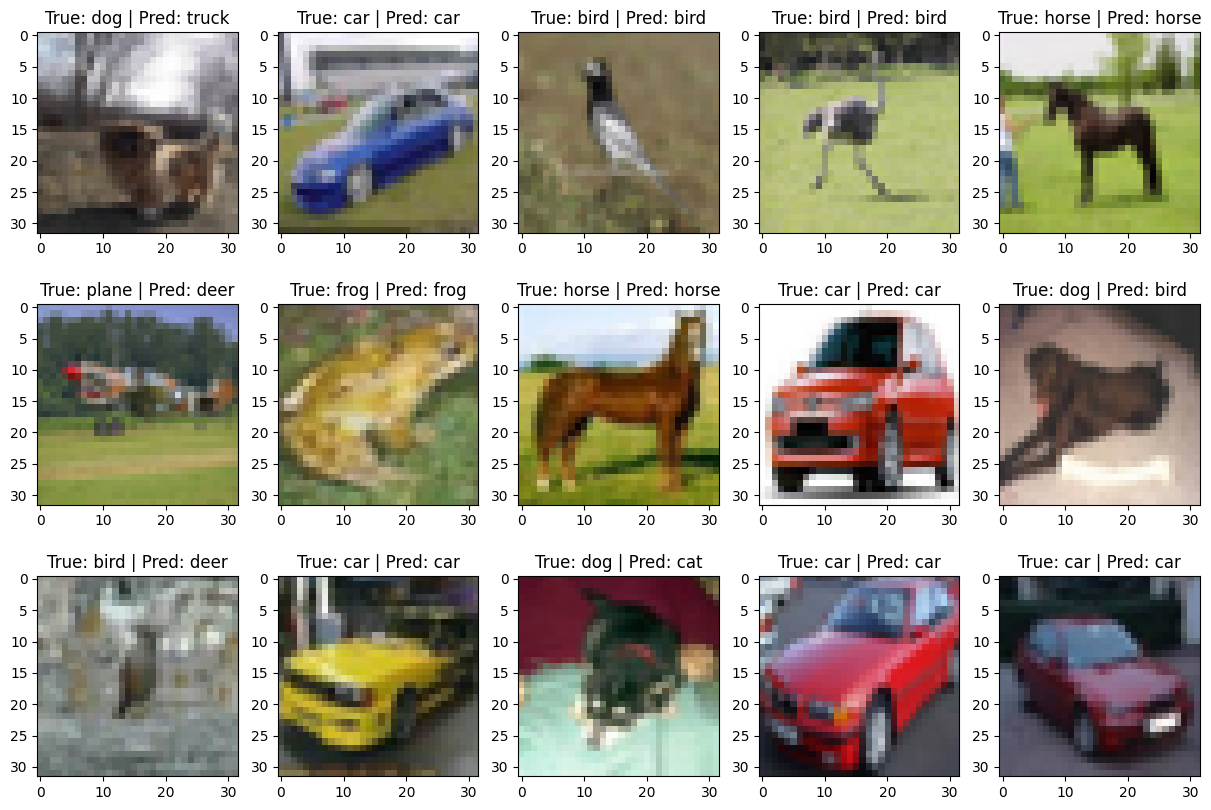

In [24]:
# Show random samples
rand_idxs = np.random.randint(x_test.shape[0], size=15)
for ii in range(15):
    # Pick a random sample
    idx = rand_idxs[ii]
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title(f'True: {classes[y_true[idx]]} | Pred: {classes[y_pred[idx]]}')

### Questions
* What is the overall accuracy of the classifier?
Answer: 0.664900004863739
* What modifications would you do in order to improve the classification accuracy?
Answer: add layers, increase amount of neurons
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

In [25]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [26]:
# Build the classifier

inputs = Input(shape=x_train.shape[1:])

# First convolutional layer
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Second convolutional layer
x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Fully connected layers
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

outputs = Dense(10, activation='softmax')(x)

model2 = Model(inputs, outputs)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        1849

In [27]:
# Train the model
history = model2.fit(x_train, y_train,
                    batch_size=128,
                    epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 15s 36ms/step - loss: 1.5197 - accuracy: 0.4924 - val_loss: 3.0745 - val_accuracy: 0.2078
Epoch 2/25
391/391 [==============================] - 14s 35ms/step - loss: 1.0993 - accuracy: 0.6170 - val_loss: 1.0045 - val_accuracy: 0.6456
Epoch 3/25
391/391 [==============================] - 14s 35ms/step - loss: 0.9518 - accuracy: 0.6647 - val_loss: 1.1483 - val_accuracy: 0.6093
Epoch 4/25
391/391 [==============================] - 14s 35ms/step - loss: 0.8478 - accuracy: 0.7015 - val_loss: 0.9947 - val_accuracy: 0.6559
Epoch 5/25
391/391 [==============================] - 14s 35ms/step - loss: 0.7716 - accuracy: 0.7295 - val_loss: 0.8835 - val_accuracy: 0.6983
Epoch 6/25
391/391 [==============================] - 14s 36ms/step - loss: 0.7037 - accuracy: 0.7517 - val_loss: 0.9214 - val_accuracy: 0.6852
Epoch 7/25
391/391 [==============================] - 14s 36ms/step - loss: 0.6566 - accuracy: 0.7686 - val_loss: 1.2232 - val_accuracy:

Train Acc      0.9107800126075745
Validation Acc 0.7544000148773193


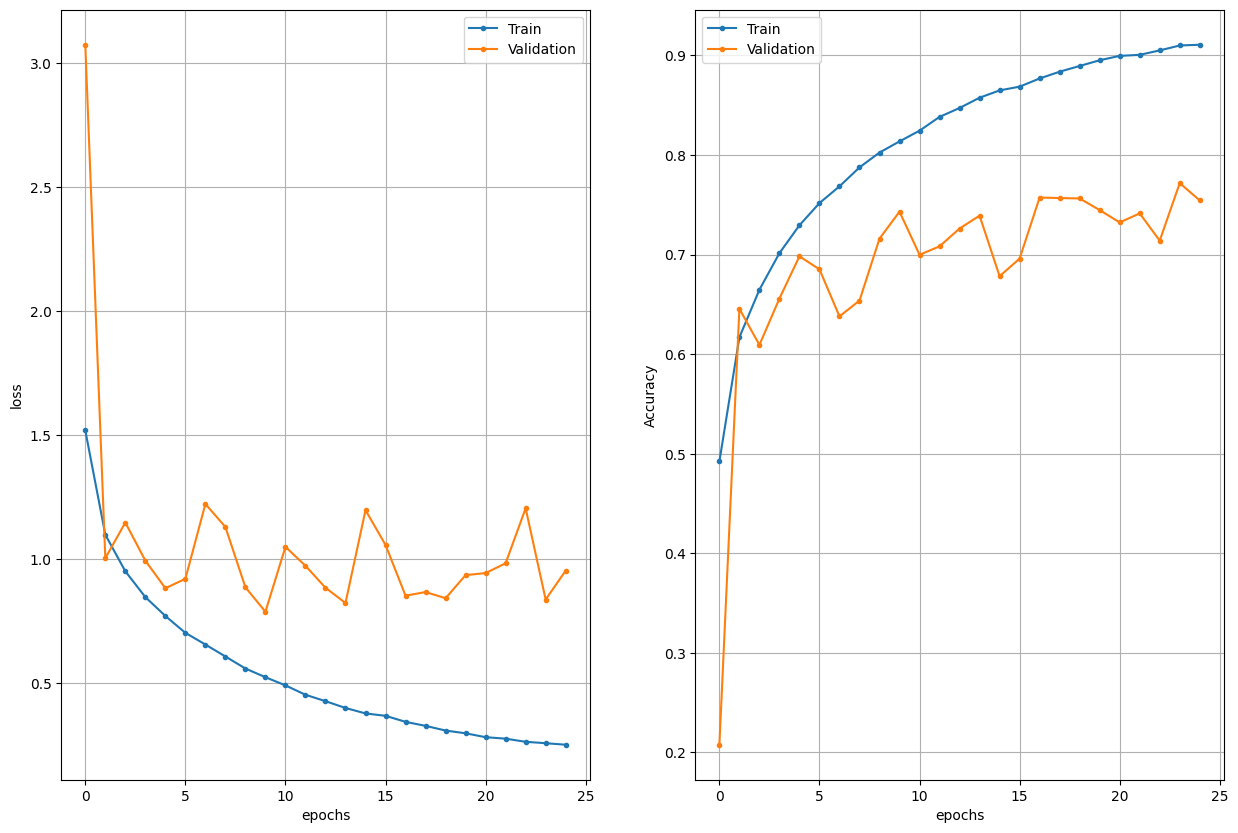

In [28]:
# Show training history

h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

In [29]:
# Compute and print the accuracy for each class

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model2.predict(x_test), axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

for class_id, class_name in classes.items():
    print(f"Accuracy for {class_name}: {class_accuracy[class_id]*100:.2f}%")

313/313 [==============================] - 2s 5ms/step
Accuracy for plane: 79.80%
Accuracy for car: 86.50%
Accuracy for bird: 65.50%
Accuracy for cat: 52.90%
Accuracy for deer: 70.50%
Accuracy for dog: 77.00%
Accuracy for frog: 85.30%
Accuracy for horse: 78.70%
Accuracy for ship: 83.10%
Accuracy for truck: 75.10%


In [30]:
# Print the overall stats
ev = model2.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test acc', ev[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9544 - accuracy: 0.7544
Test loss   0.9543596506118774
Test acc 0.7544000148773193
